## It has 2 parts in this notebook. First, we try 3 types of naive bayes built-in scikit learn on Iris dataset.

## Second, we try text classification (imdb movie review data) and compare the result.

## Part 1: Iris dataset

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = datasets.load_iris()
Xtr,Xva,Ytr,Yva = train_test_split(iris.data, iris.target, test_size=0.2, random_state=10)

In [3]:
gnb = GaussianNB()
y_pred = gnb.fit(Xtr, Ytr).predict(Xva)
total = float(len(y_pred))
gnb_accuracy = (Yva == y_pred).sum() / total
print('Accuracy: %f' % gnb_accuracy)

Accuracy: 1.000000


In [4]:
mnb = MultinomialNB()
y_pred = mnb.fit(Xtr, Ytr).predict(Xva)
mnb_accuracy = (Yva == y_pred).sum() / total
print('Accuracy: %f' % mnb_accuracy)

Accuracy: 0.600000


In [5]:
bnb = BernoulliNB()
y_pred = bnb.fit(Xtr, Ytr).predict(Xva)
bnb_accuracy = (Yva == y_pred).sum() / total
print('Accuracy: %f' % bnb_accuracy)

Accuracy: 0.233333


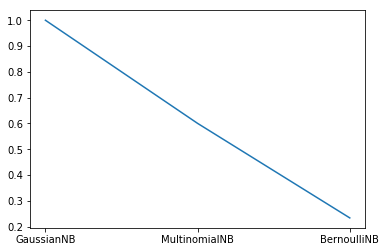

In [6]:
x = [1,2,3]
y = [gnb_accuracy, mnb_accuracy, bnb_accuracy]

my_xticks = ['GaussianNB','MultinomialNB','BernoulliNB']
plt.xticks(x, my_xticks)
plt.plot(x,y)

## We can see that Gaussian NB has highest accuracy. It seems that iris dataset has Gaussian distribution.

## Part 2: IMDB Movie Review Dataset

## Now we try text classification. We use imdb movie review data. We download the data from keras. You can also find the desciption of the dataset here: https://www.imdb.com/interfaces/

## Reviews have been preprocessed by keras, and each review is encoded as a sequence of word indexes (integers). Hence, we don't need to worry about this part here. You can find the document here: https://keras.io/datasets/

## Here we only take top 10000 most frequent words into consideration.

In [7]:
from keras.datasets import imdb

Using TensorFlow backend.


In [8]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000, seed=2018)

In [9]:
print("train_data ", x_train.shape)
print("train_labels ", y_train.shape)
print()
print("test_data ", x_test.shape)
print("test_labels ", y_test.shape)

train_data  (25000,)
train_labels  (25000,)

test_data  (25000,)
test_labels  (25000,)


## Let's take a look at actual review.

In [10]:
word_index = imdb.get_word_index()

reverse_dict = dict([(value, key) for (key, value) in word_index.items()])

actual_review = ' '.join([reverse_dict.get(i - 3, '?') for i in x_train[2018]])

print(actual_review)
print()
print('label:', y_train[2018])

? this must me one of the worst takes on vampires ever conceived by men how can one turn such a mesmerizing subject into a totally uninspiring story ? not such a difficult task first of all a ? ? ? non of any ? is a dark and gloomy atmosphere with a nice sexy touch this one lacks all these things too much light the spots oh my god why in the name of christ ? was that about br br every time dracula came about he was ? by light in the script to keep him weak for the record just weak there was only one scene that made it almost worth watching near the ending of the movie ? ? with dracula and his new conquest i really enjoyed the first one the ? twist was ? original but this one's just not good not in any way hopefully the third one will cary the vampire signature i like so much in other classics like ? ? ? dracula or even interview with the vampire

label: 0


## Here we use one hot encoding for our feature since BernoulliNB is a binary-valued variables model.

In [11]:
def onehot_encoding(sequences, dimension=10000):
    onehot = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        onehot[i, sequence] = 1.
    return onehot

In [12]:
x_train = onehot_encoding(x_train)
x_test = onehot_encoding(x_test)

print("x_train ", x_train.shape)
print("x_test ", x_test.shape)

x_train  (25000, 10000)
x_test  (25000, 10000)


## Then we try our 3 different naive bayes models.

In [13]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
total = float(len(y_pred))
gnb_accuracy = (y_test == y_pred).sum() / total
print('Accuracy: %f' % gnb_accuracy)

Accuracy: 0.696440


In [14]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
y_pred = mnb.predict(x_test)
mnb_accuracy = (y_test == y_pred).sum() / total
print('Accuracy: %f' % mnb_accuracy)

Accuracy: 0.839360


In [15]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
y_pred = bnb.predict(x_test)
bnb_accuracy = (y_test == y_pred).sum() / total
print('Accuracy: %f' % bnb_accuracy)

Accuracy: 0.840440


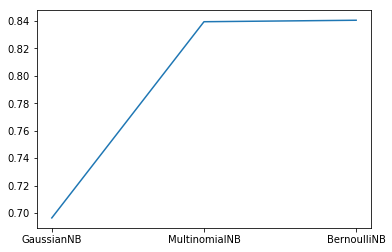

In [16]:
x = [1,2,3]
y = [gnb_accuracy, mnb_accuracy, bnb_accuracy]

my_xticks = ['GaussianNB','MultinomialNB','BernoulliNB']
plt.xticks(x, my_xticks)
plt.plot(x,y)